> Nama   : Aneira Vicentiya Kuncoro

> NIM    : A11.2022.14226

> Kelas  : Bengkel Koding - DS03

# **CAPSTONE PROJECT UAS BENGKEL KODING DATA SCIENCE**

---



## **Exploratory Data Analyst (EDA)**

---



**Exploratory Data Analysis (EDA)** adalah pendekatan untuk menganalisis dan memvisualisasikan data guna memahami pola, hubungan, distribusi, dan anomali dalam dataset. EDA bertujuan untuk memberi wawasan awal sebelum melakukan analisis lebih lanjut atau pembangunan model.

### **Persiapan Data**

---



**Persiapan data** merupakan tahap awal dalam proses analisis data yang bertujuan untuk menyiapkan segala hal yang dibutuhkan sebelum dilakukan eksplorasi lebih lanjut. Pada tahap ini, dilakukan beberapa hal penting seperti mengimpor library (pustaka) yang diperlukan, memuat dataset ke dalam lingkungan kerja Python, dan melakukan pengecekan awal terhadap isi data.

#### **Import Library**

---



**Library** adalah sekumpulan fungsi, modul, atau paket yang sudah disediakan oleh Python untuk memudahkan proses pemrograman. Dalam konteks data science dan EDA, library digunakan untuk membaca, mengolah, menganalisis, dan memvisualisasikan data secara efisien.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

**Library yang digunakan :**

* `pandas`: Untuk memanipulasi dan menganalisis data dalam bentuk tabel (`DataFrame`).

* `numpy`: Untuk perhitungan numerik dan manipulasi `array`.

* `matplotlib.pyplot`: Untuk membuat visualisasi data seperti grafik dan diagram.

* `seaborn`: Untuk membuat visualisasi data yang lebih menarik dan statistik berbasis `matplotlib`.

* `sklearn.model_selection.train_test_split`: Untuk membagi dataset menjadi data pelatihan dan data pengujian.

* `sklearn.impute.SimpleImputer`: Untuk menangani data yang hilang (missing values) dengan cara mengisi secara otomatis (misalnya dengan rata-rata, median, atau modus).

* `sklearn.preprocessing.StandardScaler`: Untuk menskalakan fitur numerik dan membantu meningkatkan performa algoritma machine learning.

* `imblearn.over_sampling.SMOTE`: Untuk mengatasi ketidakseimbangan kelas dalam dataset.

Dengan **mengimpor library**, kita dapat menggunakan berbagai fungsi canggih tanpa harus menulis ulang kodenya dari awal.

#### **Memuat dataset**

---



**Memuat dataset** adalah proses mengambil data dari sumber eksternal (seperti file `.csv`, `database`, atau `API`) ke dalam lingkungan kerja Python agar dapat diproses dan dianalisis.

In [72]:
# Load dataset
import pandas as pd # Import the pandas library and assign it to the alias 'pd'
df = pd.read_csv('ObesityDataSet.csv')

**Cara yang saya gunakan :**

* Dataset disimpan di Google Drive.

* Google Colab digunakan, sehingga perlu mount Google Drive terlebih dahulu agar file bisa diakses.

* Setelah itu, data dibaca menggunakan `pd.read_csv()` dan dimasukkan ke dalam sebuah objek `DataFrame` bernama `df`.

**Dataset** yang dimuat adalah `ObesityDataSet.csv`, yaitu kumpulan data terkait kebiasaan hidup, antropometri, dan status obesitas individu.

#### **Menampilkan 5 Baris Pertama Dataset**

---



Menampilkan **5 baris pertama dataset** dengan `df.head()`

In [73]:
# Tampilkan 5 baris pertama dataset
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


**Bertujuan untuk :**

* Melihat isi data secara umum.

* Mengetahui nama-nama kolom dan tipe data.

* Mengidentifikasi kemungkinan adanya nilai yang tidak valid, kosong, atau tidak konsisten.

Langkah ini sangat penting untuk memberikan **gambaran awal** tentang **struktur dan kualitas data** sebelum dilakukan analisis lebih lanjut.

### **Pemahaman Data**

---



Tahapan **Pemahaman Data** bertujuan untuk mengenali struktur, tipe, dan isi dari dataset yang telah dimuat. Hal ini penting agar analis data dapat menentukan langkah-langkah pembersihan, transformasi, dan visualisasi yang tepat di tahap berikutnya.

#### **Cek Tipe Data dan Informasi Dataset**

---



Fungsi `df.info()` memberikan **gambaran umum tentang struktur dataset**, meliputi:

* Jumlah baris (`entries`),

* Nama kolom,

* Jumlah `non-null` (nilai yang tidak kosong) di setiap kolom,

* Tipe data masing-masing kolom (seperti `int64`, `float64`, atau `object`).

In [74]:
# Cek tipe data dan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

**Tujuan :**

* Untuk mengetahui apakah ada kolom yang memiliki nilai kosong (`missing values`).

* Untuk memahami tipe data, sehingga dapat dipersiapkan untuk proses analisis atau konversi tipe data yang diperlukan.

#### **Menampilkan Kolom dalam Dataset**

---



Fungsi ini **menampilkan daftar nama kolom pada dataset**. Ini membantu kita untuk:

* Memahami atribut atau fitur apa saja yang tersedia,

* Menghindari kesalahan penulisan nama kolom saat melakukan manipulasi data selanjutnya.


In [75]:
# Menampilkan kolom dalam dataset
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

#### **Melihat Jumlah Data**

---



Fungsi `df.shape` akan mengembalikan ukuran dataset dalam format (baris, kolom).

**Output:** `(2111, 17)` berarti dataset memiliki:

`2111` baris data (jumlah observasi/individu),

`17` kolom (jumlah fitur/variabel).

In [76]:
# Melihat jumlah data dalam setiap fitur
df.shape

(2111, 17)

**Tujuan :**

* Mengetahui seberapa besar data yang akan dianalisis.

* Mengantisipasi kebutuhan pembersihan atau segmentasi data.

#### **Statistik Ringkasan Dataset**

---



Fungsi `df.describe()` memberikan **ringkasan statistik dari kolom bertipe numerik**, seperti:

* `count`: jumlah data tidak kosong,

* `mean`: nilai rata-rata,

* `std`: standar deviasi (sebaran data),

* `min`: nilai minimum,

* `25%`, `50%`, `75%`: nilai kuartil,

* `max`: nilai maksimum.

In [77]:
# Statistik ringkasan dataset
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


**Tujuan :**

* Melihat distribusi nilai pada setiap kolom numerik.

* Menemukan kemungkinan data ekstrem (outlier) atau nilai yang tidak masuk akal.

* Menjadi acuan awal dalam memahami sebaran data yang ada.

### **Pengecekan Data yang Tidak Konsisten**

---



Dataset sering kali mengandung data yang tidak lengkap (`missing values`), tidak konsisten, atau salah format. Bagian ini bertujuan untuk :

* Mengidentifikasi data yang hilang atau tidak sesuai,

* Melakukan perbaikan agar data siap dianalisis.

#### **Cek Jumlah Missing Values di Setiap Kolom**

---



Fungsi ini digunakan untuk **menghitung jumlah nilai kosong (`NaN`)** di setiap kolom dataset. Missing values dapat mengganggu proses analisis atau model machine learning, sehingga perlu dideteksi dan ditangani.

In [78]:
# Cek jumlah missing values di setiap kolom
df.isnull().sum()

Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

#### **Mencari Duplikat Data**

---



In [79]:
# Mengecek jumlah baris yang terduplikasi
df.duplicated().sum()

18

* `df.duplicated()` akan menghasilkan boolean series (True/False) untuk setiap baris, menandakan apakah baris tersebut adalah duplikat.

* `.sum()` akan menjumlahkan nilai True yang dianggap sebagai 1, sehingga kamu akan mendapat jumlah total baris duplikat dalam dataframe.

#### **Menampilkan jumlah nilai unik**

---



Digunakan untuk **melihat berapa banyak nilai unik yang dimiliki oleh setiap kolom bertipe kategorikal** (`object`). Digunakan untuk :

* Mengetahui keragaman data kategorikal,

* Mendeteksi kolom yang mungkin memiliki nilai aneh atau duplikat penulisan (seperti `Yes`, `yes`, `YES` dianggap berbeda).

In [80]:
# Menampilkan jumlah nilai unik dari kolom bertipe kategorikal
df.select_dtypes(include='object').nunique()

Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE                                3
CH2O                              1263
family_history_with_overweight       3
FAF                               1186
TUE                               1130
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64

#### **Cek Keseimbangan Data**

In [81]:
# Hitung jumlah tiap kelas obesitas
class_counts = df['NObeyesdad'].value_counts()
print("Jumlah data per kelas:")
print(class_counts)

Jumlah data per kelas:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


### **Visualisasi Data**

---



Dalam proses **Exploratory Data Analysis (EDA)**, visualisasi data sangat penting untuk memahami pola, tren, dan anomali dalam dataset secara intuitif.

#### **Visualisasi Distribusi Kelas Sebelum SMOTE**

---



**Countplot** digunakan untuk menghitung dan memvisualisasikan jumlah kemunculan dari setiap kelas pada label target seperti NObeyesdad, yang merepresentasikan kategori obesitas (misalnya: `Insufficient_Weight`, `Normal_Weight`, `Obesity_Type_I`, dan lainnya). Dengan countplot, kita dapat **melihat distribusi data antar kelas dan mengevaluasi apakah dataset tersebut seimbang** (jumlah data di tiap kelas relatif sama) **atau tidak seimbang** (salah satu kelas mendominasi). Informasi ini sangat penting terutama dalam konteks pemodelan machine learning, karena ketidakseimbangan kelas dapat memengaruhi performa model dan membuat prediksi cenderung bias terhadap kelas mayoritas.

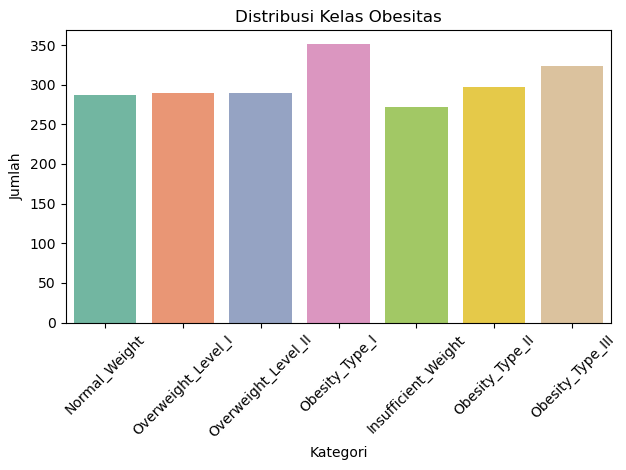

In [82]:
# Distribusi Kelas Obesitas
sns.countplot(x='NObeyesdad', hue='NObeyesdad', data=df, palette='Set2', legend=False)
plt.xticks(rotation=45)
plt.title("Distribusi Kelas Obesitas")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

**Interpretasi :**
* Kategori dengan **jumlah terbanyak** : `Obesity_Type_I` (~350 individu)

* Kategori dengan **jumlah terendah** : `Insufficient_Weight` (~275 individu)

* Kategori lain seperti `Normal_Weight`, `Overweight_Level_I`, dan `Overweight_Level_II` memiliki jumlah yang hampir sama (sekitar 290-an).

* Terdapat tren bahwa kategori obesitas (Type I, II, III) memiliki jumlah yang relatif tinggi, mengindikasikan prevalensi obesitas cukup besar dalam dataset ini.

Jadi,
* Jumlah orang **terbanyak ada di kategori Obesity Type I**
Artinya, banyak orang dalam data ini mengalami obesitas tipe I.

* Jumlah **paling sedikit ada di kategori Insufficient Weight** (berat badan kurang)
Jadi, tidak banyak orang yang kekurangan berat badan.

* Kategori Normal Weight (berat badan normal) tidak paling banyak
Ini mengindikasikan bahwa **lebih banyak orang yang kelebihan berat atau obesitas dibanding yang berat badannya normal**.

### **Deteksi Outliers**

#### **Visualisasi Menggunakan Boxplot**

---



**Boxplot** digunakan untuk melihat distribusi data numerik dan mengidentifikasi keberadaan **outliers**. Dengan visualisasi ini, kita bisa lebih mudah memahami sebaran data dan menentukan apakah outliers perlu ditangani atau tidak.

In [83]:
print("\n[INFO] Mendeteksi Outliers")

# Define num_cols to contain the names of numerical columns
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]


[INFO] Mendeteksi Outliers


In [84]:
# Ambil kolom numerik
num_cols = df.select_dtypes(include=np.number).columns

In [85]:
# Pastikan hanya kolom ini yang digunakan
kolom_numerik = ['Age', 'Weight', 'Height']


Visualisasi SEBELUM outlier ditangani:


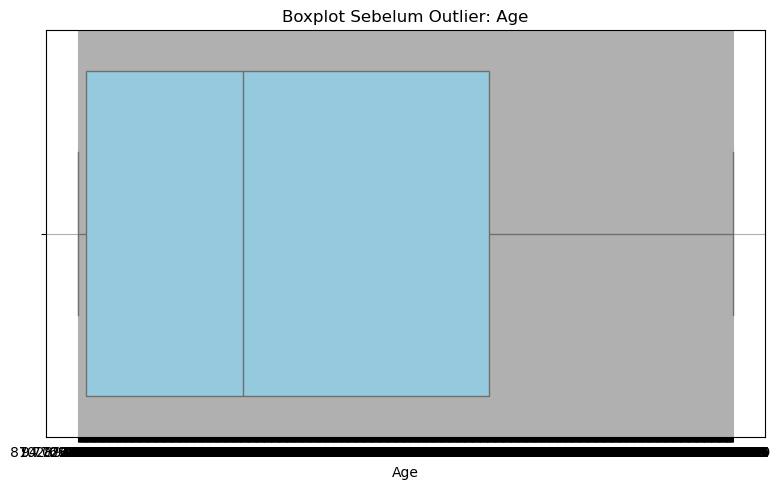

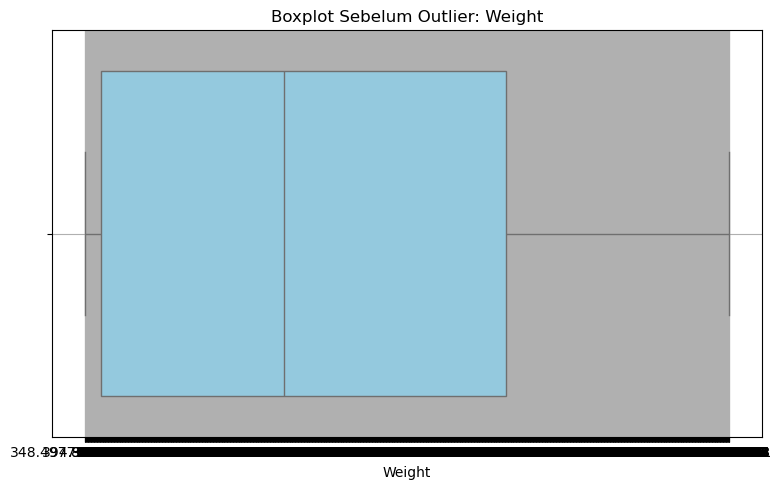

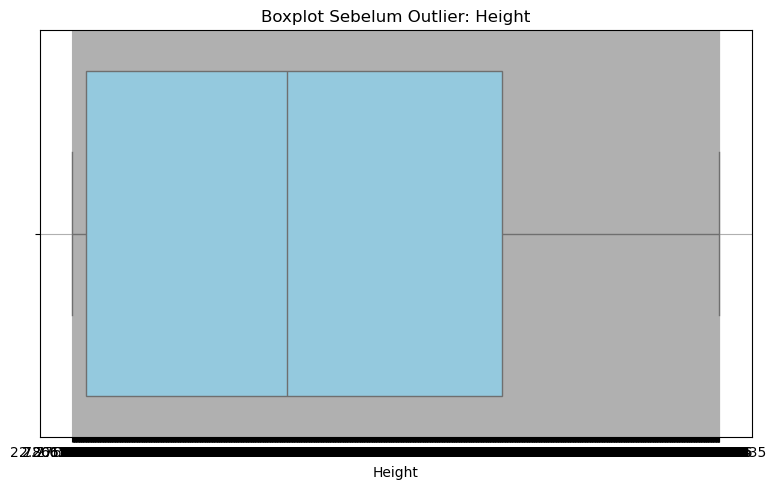

In [86]:
# Visualisasi boxplot sebelum outlier ditangani
print("\nVisualisasi SEBELUM outlier ditangani:")

for col in kolom_numerik:
    if df[col].dropna().empty:
        print(f"Kolom {col} kosong atau hanya NaN, dilewati.")
        continue
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot Sebelum Outlier: {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

> Berdasarkan hasil **eksplorasi data (EDA)**, dapat disimpulkan bahwa data usia, berat badan, dan tinggi badan memiliki distribusi yang tidak normal dan cenderung skewed, dengan sejumlah outlier yang perlu diperhatikan. Dataset menunjukkan ketidakseimbangan kelas pada label `NObeyesdad`, di mana beberapa kategori obesitas mendominasi. Visualisasi scatter plot mengindikasikan adanya pola pemisahan antar kelas obesitas, khususnya pada kombinasi fitur berat badan dan tinggi badan yang berkaitan erat dengan BMI. Insight ini menunjukkan bahwa fitur-fitur numerik seperti berat, tinggi, dan usia sangat berpengaruh dalam membedakan kelas obesitas, serta perlu penanganan khusus pada outlier dan ketidakseimbangan data sebelum dilakukan modeling lebih lanjut.

----

## **DATA PREPROCESSING**

**Data preprocessing** adalah proses awal dalam analisis data atau machine learning yang bertujuan untuk membersihkan, memformat, dan mempersiapkan data mentah agar bisa digunakan secara efektif dalam pemodelan atau analisis. Data mentah sering kali mengandung noise, missing values, format tidak konsisten, atau outlier yang dapat memengaruhi hasil model jika tidak ditangani.

### **Menangani Missing Value**

**Missing value** (nilai yang hilang) adalah sel atau entri dalam dataset yang tidak memiliki data atau bernilai kosong. Dalam file `.csv` atau data frame Python (Pandas), ini sering terlihat sebagai `NaN`, `None`, atau hanya sel kosong.

Menangani **missing value** adalah langkah penting pertama dalam preprocessing data. Tanpa ini, analisis dan model yang dibangun berisiko bias, error, atau tidak valid. Pilih metode penanganan berdasarkan jenis data, jumlah missing, dan tujuan analisis.

#### **Mengganti Tanda `'?'` dengan `NaN`**

---



Beberapa dataset menandai nilai kosong atau tidak diketahui dengan simbol `'?'`, bukan `NaN`. Karena Python mengenali NaN sebagai `missing value`, kita perlu mengganti tanda `'?'` menjadi `np.nan`. **Tujuannya**, agar Python dan library analisis bisa mengenali nilai kosong secara standar.

In [87]:
# Mengganti tanda '?' dengan NaN
df.replace('?', np.nan, inplace=True)

#### **Menghapus Data Duplikat**

---



In [88]:
# Cek dan hapus data duplikat
print("Jumlah data duplikat sebelum dihapus:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("Jumlah data duplikat setelah dihapus:", df.duplicated().sum())

Jumlah data duplikat sebelum dihapus: 18
Jumlah data duplikat setelah dihapus: 0


* `df.drop_duplicates()` menghapus semua baris yang terduplikasi dan hanya menyisakan baris pertama dari setiap duplikat.

* Hasilnya disimpan kembali ke variabel `df`, sehingga dataframe sekarang sudah bersih dari duplikasi.

#### **Konversi Numerik**

---



In [89]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df.dropna(inplace=True)

In [90]:
# Identifikasi Kategorikal dan Numerik
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include='object').drop(columns='NObeyesdad').columns.tolist()

#### **Data Imputation**

---



In [91]:
# Imputasi Data Sebelum Encoding
imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

#### **Menangani Outlier dan Mengganti Outlier dengan Batas Bawah/Atas**

---



**Outlier** adalah nilai yang menyimpang jauh dari nilai-nilai lain dalam dataset. Outlier bisa mempengaruhi distribusi data dan kinerja model prediksi. Salah satu cara umum untuk menangani outlier adalah dengan **mengganti nilai ekstrem menggunakan batas bawah dan atas dari IQR (*Interquartile Range*)**.

In [92]:
# Menangani Outlier
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

**Penjelasan**

* `Q1` dan `Q3` adalah kuartil pertama dan ketiga dari distribusi data.

* `IQR` adalah rentang antar-kuartil.

* Nilai di bawah lower_bound dan di atas `upper_bound` dianggap outlier, dan diganti dengan nilai batasnya masing-masing.

#### **Visualisasi Setelah Mengganti Outliers**


Visualisasi SETELAH outlier ditangani:


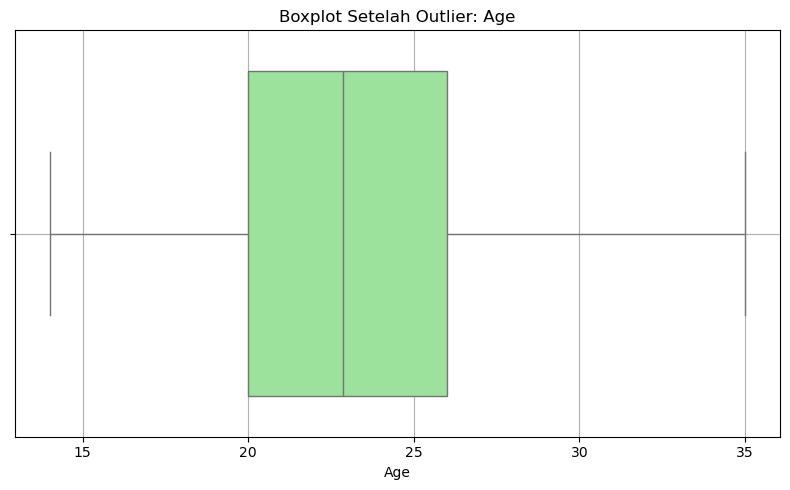

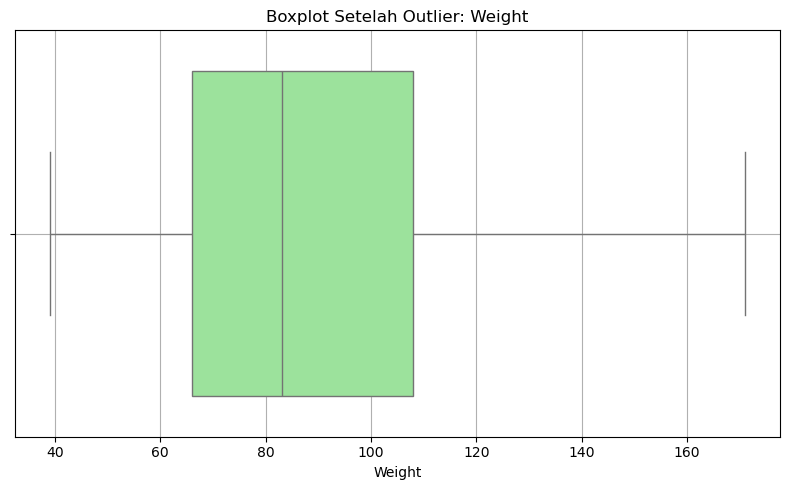

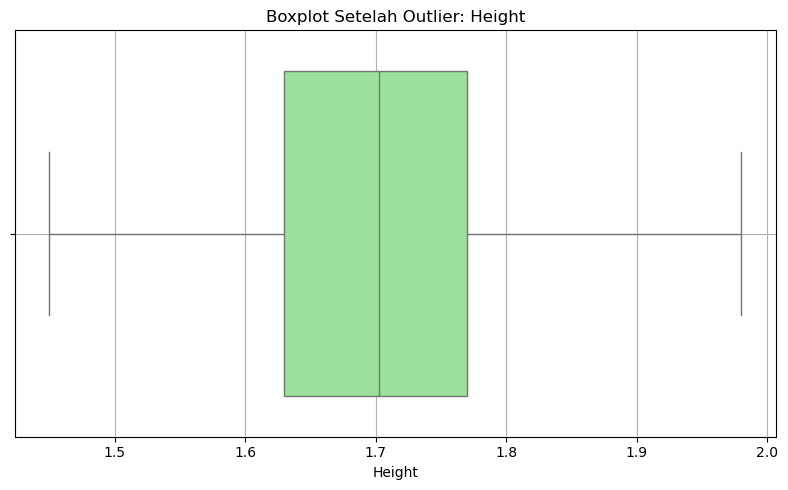

In [93]:
print("\nVisualisasi SETELAH outlier ditangani:")

# Use the original df DataFrame which has been modified in place
for col in ['Age', 'Weight', 'Height']:
    # Check if the column exists and is not empty after dropping NaNs (though dropna() won't remove anything here if no NaNs exist)
    # A more robust check might be needed if NaNs were introduced, but based on previous steps, there shouldn't be any.
    # Let's simplify the check assuming no NaNs were introduced by outlier handling.
    if col not in df.columns or df[col].empty:
        print(f"Kolom {col} tidak ada atau kosong, dilewati.")
        continue

    plt.figure(figsize=(8, 5))
    # Use df[col] directly as it contains the data after outlier handling
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot Setelah Outlier: {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### **Transformasi Data**

----

**Transformasi data** adalah proses mengubah data mentah menjadi format yang lebih sesuai untuk analisis atau pemodelan machine learning. Proses ini mencakup berbagai teknik seperti encoding data kategorikal menjadi numerik, normalisasi data agar berada pada skala yang sama. Dengan demikian, transformasi data merupakan langkah penting dalam tahap preprocessing yang dapat meningkatkan akurasi dan efisiensi model secara keseluruhan.

#### **Pisah Fitur dan Target**

----

Digunakan untuk memisahkan fitur (X) dan target/label (y) dari dataset sebelum model dilatih.

In [94]:
X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad']

#### **One-Hot Encoding**

----

**One-Hot Encoding** adalah teknik untuk mengubah data kategorikal menjadi format numerik agar bisa diproses oleh model machine learning.

Untuk memproses **data kategorikal**, kita perlu mengubahnya menjadi bentuk **numerik** karena algoritma *machine learning* biasanya hanya bekerja dengan angka.

In [95]:
# One-Hot Encoding
X = pd.get_dummies(X, columns=cat_cols)

#### **Normalisasi**

----

Untuk melakukan normalisasi (scaling) pada fitur numerik, yaitu menyesuaikan skala semua nilai numerik agar memiliki distribusi standar.

In [96]:
# Normalisasi
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [97]:
# Simpan Kolom untuk Streamlit
feature_columns = X.columns

#### **Menangani Ketidakseimbangan Data dengan SMOTE**

----

Ketika data target (label) tidak seimbang, model cenderung bias ke kelas mayoritas. SMOTE **(*Synthetic Minority Over-sampling Technique*)** digunakan untuk membuat salinan sintetis dari kelas minoritas.

In [98]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1793, 4381)
y shape: (1793,)


In [99]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE pada data X dan y
X_bal, y_bal = smote.fit_resample(X, y)

#### **Split Data**

----

**Split Data** digunakan untuk membagi data menjadi dua bagian: data untuk melatih model (training) dan data untuk mengujinya (testing).

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

#### **Pemodelan dan Evaluasi**

----

#### **Support Vector Machine (SVM)**

In [101]:
from sklearn.svm import SVC
import time

svm_model = SVC(kernel='rbf', random_state=42)
start_time = time.time()
svm_model.fit(X_train, y_train)
svm_time = time.time() - start_time
svm_pred = svm_model.predict(X_test)

#### **Random Forest**

In [102]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
start_time = time.time()
rf_model.fit(X_train, y_train)
rf_time = time.time() - start_time
rf_pred = rf_model.predict(X_test)

#### **K-Nearest Neighbors (KNN)**

In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
start_time = time.time()
knn_model.fit(X_train, y_train)
knn_time = time.time() - start_time
knn_pred = knn_model.predict(X_test)

#### **Decision Tree**

In [104]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
start_time = time.time()
dt_model.fit(X_train, y_train)
dt_time = time.time() - start_time
dt_pred = dt_model.predict(X_test)

#### **Logistic Regression**

In [105]:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)  # max_iter ditingkatkan agar konvergen
start_time = time.time()
lr_model.fit(X_train, y_train)
lr_time = time.time() - start_time
lr_pred = lr_model.predict(X_test)

#### **Evaluasi Model**

In [106]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fungsi evaluasi
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Evaluasi model-model
evaluate_model(y_test, svm_pred, "SVM")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, knn_pred, "KNN")
evaluate_model(y_test, dt_pred, "Decision Tree")
evaluate_model(y_test, lr_pred, "Logistic Regression")


Model: SVM
Accuracy: 0.9
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.98      0.94      0.96        65
      Normal_Weight       0.81      0.94      0.87        62
     Obesity_Type_I       0.93      0.84      0.88        68
    Obesity_Type_II       0.86      0.98      0.92        61
   Obesity_Type_III       1.00      1.00      1.00        59
 Overweight_Level_I       0.84      0.78      0.81        60
Overweight_Level_II       0.90      0.83      0.86        65

           accuracy                           0.90       440
          macro avg       0.90      0.90      0.90       440
       weighted avg       0.90      0.90      0.90       440

Confusion Matrix:
 [[61  4  0  0  0  0  0]
 [ 1 58  0  0  0  3  0]
 [ 0  0 57  6  0  2  3]
 [ 0  0  1 60  0  0  0]
 [ 0  0  0  0 59  0  0]
 [ 0  7  0  3  0 47  3]
 [ 0  3  3  1  0  4 54]]

Model: Random Forest
Accuracy: 0.9090909090909091
Classification Report:
              

#### **Visualisasi Perbandingan Performa**

In [107]:
import time

start = time.time()
dt_model.fit(X_train, y_train)
dt_time = time.time() - start

start = time.time()
lr_model.fit(X_train, y_train)
lr_time = time.time() - start

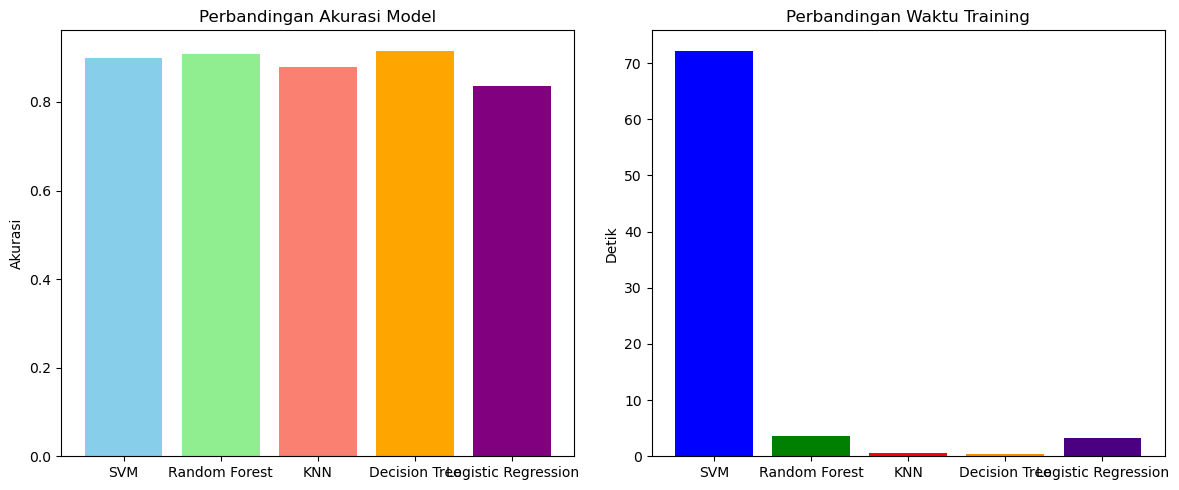

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

models = ['SVM', 'Random Forest', 'KNN', 'Decision Tree', 'Logistic Regression']
accuracies = [
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, knn_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, lr_pred)
]

times = [svm_time, rf_time, knn_time, dt_time, lr_time]

plt.figure(figsize=(12, 5))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple'])
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")

# Grafik Waktu Training
plt.subplot(1, 2, 2)
plt.bar(models, times, color=['blue', 'green', 'red', 'darkorange', 'indigo'])
plt.title("Perbandingan Waktu Training")
plt.ylabel("Detik")

plt.tight_layout()
plt.show()

Dari hasil evaluasi lima model klasifikasi—SVM, Random Forest, KNN, Decision Tree, dan Logistic Regression—dapat disimpulkan beberapa hal sebagai berikut:

* **Performa Akurasi**

  Berdasarkan hasil pengujian, model Decision Tree menunjukkan performa akurasi terbaik dibandingkan keempat model lainnya. Disusul oleh Random Forest dan SVM yang juga menghasilkan akurasi tinggi dan cukup stabil. Meskipun K-Nearest Neighbors (KNN) memberikan hasil yang sedikit lebih rendah, performanya masih tergolong baik. Sementara itu, Logistic Regression menempati posisi terakhir dalam hal akurasi, dengan nilai yang relatif lebih rendah dibandingkan model lainnya. Hal ini mengindikasikan bahwa model berbasis pohon keputusan lebih unggul dalam mempelajari pola dari data yang digunakan.

* **Waktu Training**

  Dari sisi waktu training, Decision Tree dan Logistic Regression merupakan model yang paling cepat untuk dilatih. Sementara itu, SVM dan Random Dalam hal efisiensi waktu pelatihan, terdapat perbedaan signifikan antar model. SVM merupakan model dengan waktu pelatihan paling lama, tercatat mencapai lebih dari 70 detik. Sebaliknya, Decision Tree dan KNN mampu menyelesaikan pelatihan dengan waktu yang sangat cepat, bahkan nyaris instan. Random Forest dan Logistic Regression berada di posisi menengah, dengan waktu pelatihan yang tidak terlalu lama namun tetap lebih tinggi dibandingkan Decision Tree dan KNN. Perbedaan ini penting dipertimbangkan terutama untuk kebutuhan implementasi sistem real-time atau dengan keterbatasan sumber daya komputasi.

* **Pemilihan Model**

  Dalam memilih model terbaik, perlu mempertimbangkan kombinasi antara akurasi dan efisiensi waktu pelatihan. Decision Tree menjadi pilihan paling seimbang karena mampu memberikan akurasi tinggi dengan waktu pelatihan yang sangat cepat. Random Forest juga dapat dipilih jika akurasi lebih diutamakan dan waktu pelatihan yang sedikit lebih lama masih dapat ditoleransi. Di sisi lain, Logistic Regression dapat digunakan untuk kasus sederhana yang membutuhkan pelatihan cepat meski dengan akurasi yang lebih rendah. Sementara itu, penggunaan SVM sebaiknya dipertimbangkan kembali, khususnya jika diterapkan pada dataset besar, mengingat waktu pelatihannya yang sangat lama.

* **Rekomendasi**

  Rekomendasi akhir dalam pemilihan model sebaiknya disesuaikan dengan kebutuhan dan karakteristik aplikasi. Jika tujuan utama adalah memperoleh model dengan akurasi tinggi dan pelatihan cepat, maka Decision Tree merupakan pilihan ideal. Untuk implementasi yang membutuhkan interpretabilitas serta efisiensi pelatihan, Logistic Regression dan KNN bisa menjadi alternatif yang layak. Sedangkan Random Forest cocok diterapkan pada proyek yang menekankan pada ketepatan prediksi meskipun dengan waktu pelatihan yang sedikit lebih besar. SVM hanya disarankan jika dilakukan tuning hyperparameter yang optimal dan sumber daya komputasi memadai.

Saya memilih model **Decision Tree** karena mampu memberikan akurasi tertinggi di antara semua model yang diuji, sekaligus memiliki waktu pelatihan yang sangat cepat. Keunggulan ini menjadikan Decision Tree ideal untuk digunakan dalam sistem yang membutuhkan prediksi akurat namun tetap efisien secara komputasi. Selain itu, struktur model yang mudah dipahami membuatnya lebih interpretable dibanding model lain seperti Random Forest atau SVM. Kombinasi antara kinerja yang baik, efisiensi waktu, dan kemudahan interpretasi menjadikan Decision Tree sebagai pilihan terbaik dalam proyek ini.

### **Hyperparameter Tuning**

----

#### **Hyperparameter Tuning: Random Forest (GridSearchCV)**

----

Pada tahap ini dilakukan proses **hyperparameter tuning** terhadap algoritma **Decision Tree** dengan menggunakan metode GridSearchCV. Teknik ini mengevaluasi berbagai kombinasi parameter secara sistematis untuk menemukan konfigurasi terbaik yang menghasilkan akurasi tertinggi melalui validasi silang. Parameter yang diuji meliputi jumlah pohon (`n_estimators`), kedalaman maksimum pohon (`max_depth`), jumlah minimum sampel untuk split (`min_samples_split`), dan jumlah minimum sampel di daun pohon (`min_samples_leaf`). Dengan konfigurasi `cv=5`, GridSearchCV melakukan `5-fold cross-validation` untuk setiap kombinasi parameter, sehingga hasil tuning yang diperoleh lebih andal dan tidak bergantung pada subset data tertentu.

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definisi parameter grid untuk Decision Tree
param_grid = {
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [110]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, None], 'min_samples_split': [2, 5]},
             scoring='accuracy', verbose=1)

#### **Latih Ulang dengan Parameter Terbaik**

----

Setelah **GridSearchCV** menemukan kombinasi parameter terbaik, model Decision Tree kemudian dilatih ulang menggunakan konfigurasi tersebut. Model hasil tuning diperoleh dari atribut `.best_estimator_`, yang sudah teruji memberikan akurasi tertinggi pada data pelatihan selama proses validasi silang. Pelatihan ulang ini dilakukan dengan data latih (`X_train` dan `y_train`) yang sama, tetapi menggunakan parameter optimal. Tujuan dari tahap ini adalah untuk menghasilkan model akhir yang siap diuji pada data baru dan mampu memberikan performa terbaik dalam klasifikasi obesitas.

In [111]:
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}


In [112]:
# Model terbaik dari hasil tuning
best_dt = grid_search.best_estimator_

# # Latih ulang model terbaik (sebenarnya sudah dilatih saat GridSearchCV.fit, tapi ini untuk memastikan)
# best_dt.fit(X_train, y_train)

# Prediksi ulang dengan model yang sudah dituning
dt_pred_tuned = best_dt.predict(X_test)

#### **Evaluasi Model Sebelum & Sesudah Tuning**

----

**Evaluasi model** dilakukan dengan membandingkan performa prediksi antara model Decision Tree sebelum dan sesudah tuning. Metode evaluasi menggunakan metrik akurasi dan `classification report` yang mencakup `precision`, `recall`, `f1-score`, serta jumlah dukungan (support) untuk tiap kelas obesitas. Perbandingan ini bertujuan untuk melihat seberapa besar peningkatan performa yang diperoleh setelah parameter model dioptimalkan, serta untuk memastikan bahwa model tidak hanya unggul dalam satu kelas tertentu, tetapi memberikan hasil yang seimbang di seluruh kelas.

In [113]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluasi sebelum tuning
print("Decision Tree (Sebelum Tuning)")
print("Accuracy:", accuracy_score(y_test, dt_pred))

# Evaluasi sesudah tuning
print("\nDecision Tree (Setelah Tuning)")
print("Accuracy:", accuracy_score(y_test, dt_pred_tuned))
print(classification_report(y_test, dt_pred_tuned))

Decision Tree (Sebelum Tuning)
Accuracy: 0.9159090909090909

Decision Tree (Setelah Tuning)
Accuracy: 0.9386363636363636
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.98      0.96        65
      Normal_Weight       0.91      0.85      0.88        62
     Obesity_Type_I       0.96      0.96      0.96        68
    Obesity_Type_II       0.94      0.98      0.96        61
   Obesity_Type_III       0.98      1.00      0.99        59
 Overweight_Level_I       0.91      0.87      0.89        60
Overweight_Level_II       0.92      0.92      0.92        65

           accuracy                           0.94       440
          macro avg       0.94      0.94      0.94       440
       weighted avg       0.94      0.94      0.94       440



#### **Visualisasi Perbandingan Performa**

----

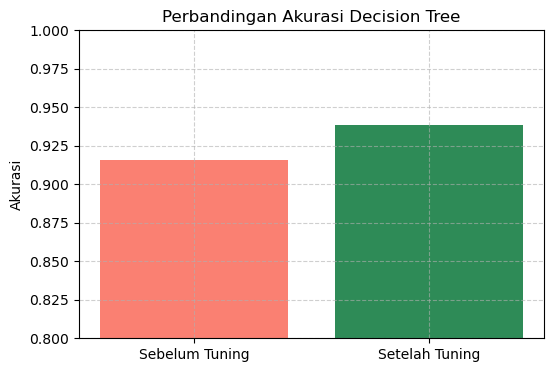

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Hitung akurasi sebelum dan sesudah tuning Decision Tree
acc_before = accuracy_score(y_test, dt_pred)
acc_after = accuracy_score(y_test, dt_pred_tuned)

# Visualisasi
plt.figure(figsize=(6, 4))
plt.bar(['Sebelum Tuning', 'Setelah Tuning'], [acc_before, acc_after], color=['salmon', 'seagreen'])
plt.ylim(0.8, 1)
plt.title('Perbandingan Akurasi Decision Tree')
plt.ylabel('Akurasi')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Kesimpulan :**

Berdasarkan visualisasi pada grafik Perbandingan Akurasi Decision Tree, dapat disimpulkan bahwa proses hyperparameter tuning memberikan dampak positif terhadap kinerja model. Terlihat adanya peningkatan akurasi setelah tuning dilakukan, dari sebelumnya sekitar 91% menjadi lebih dari 93%. Hal ini menunjukkan bahwa pemilihan parameter yang optimal melalui GridSearchCV berhasil meningkatkan kemampuan model dalam mempelajari pola dari data secara lebih efektif. Dengan demikian, tuning model merupakan langkah penting dalam pipeline machine learning untuk mencapai performa prediksi yang maksimal.

In [116]:
import pickle

# Simpan Model, Scaler, dan Fitur
with open('dt_model.sav', 'wb') as f:
    pickle.dump(dt_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns.tolist(), f)

# Simpan Kolom Numerik Saat Scaler Fit
with open('numerical_columns.pkl', 'wb') as f:
    pickle.dump(num_cols, f)